In [1]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('spotify-2023.csv',encoding='latin1')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [6]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
df.dtypes

In [ ]:
# Handling Missing values

df.isnull().sum()

In [9]:
## Dropping NA
df_cleaned = df.dropna()

In [19]:
## Replacing with Unknown
df_filled = df.fillna('Unknown')

In [23]:
## Handling both columns saparately
## In in_shazam_charts we are replacing it with 0
## In Key We will fill it with Mode
df['in_shazam_charts'].fillna(0, inplace=True)
df['key'].fillna(df['key'].mode()[0],inplace=True)

In [26]:
## Checking for remaining
df.isna().sum().any()

np.False_

<Axes: >

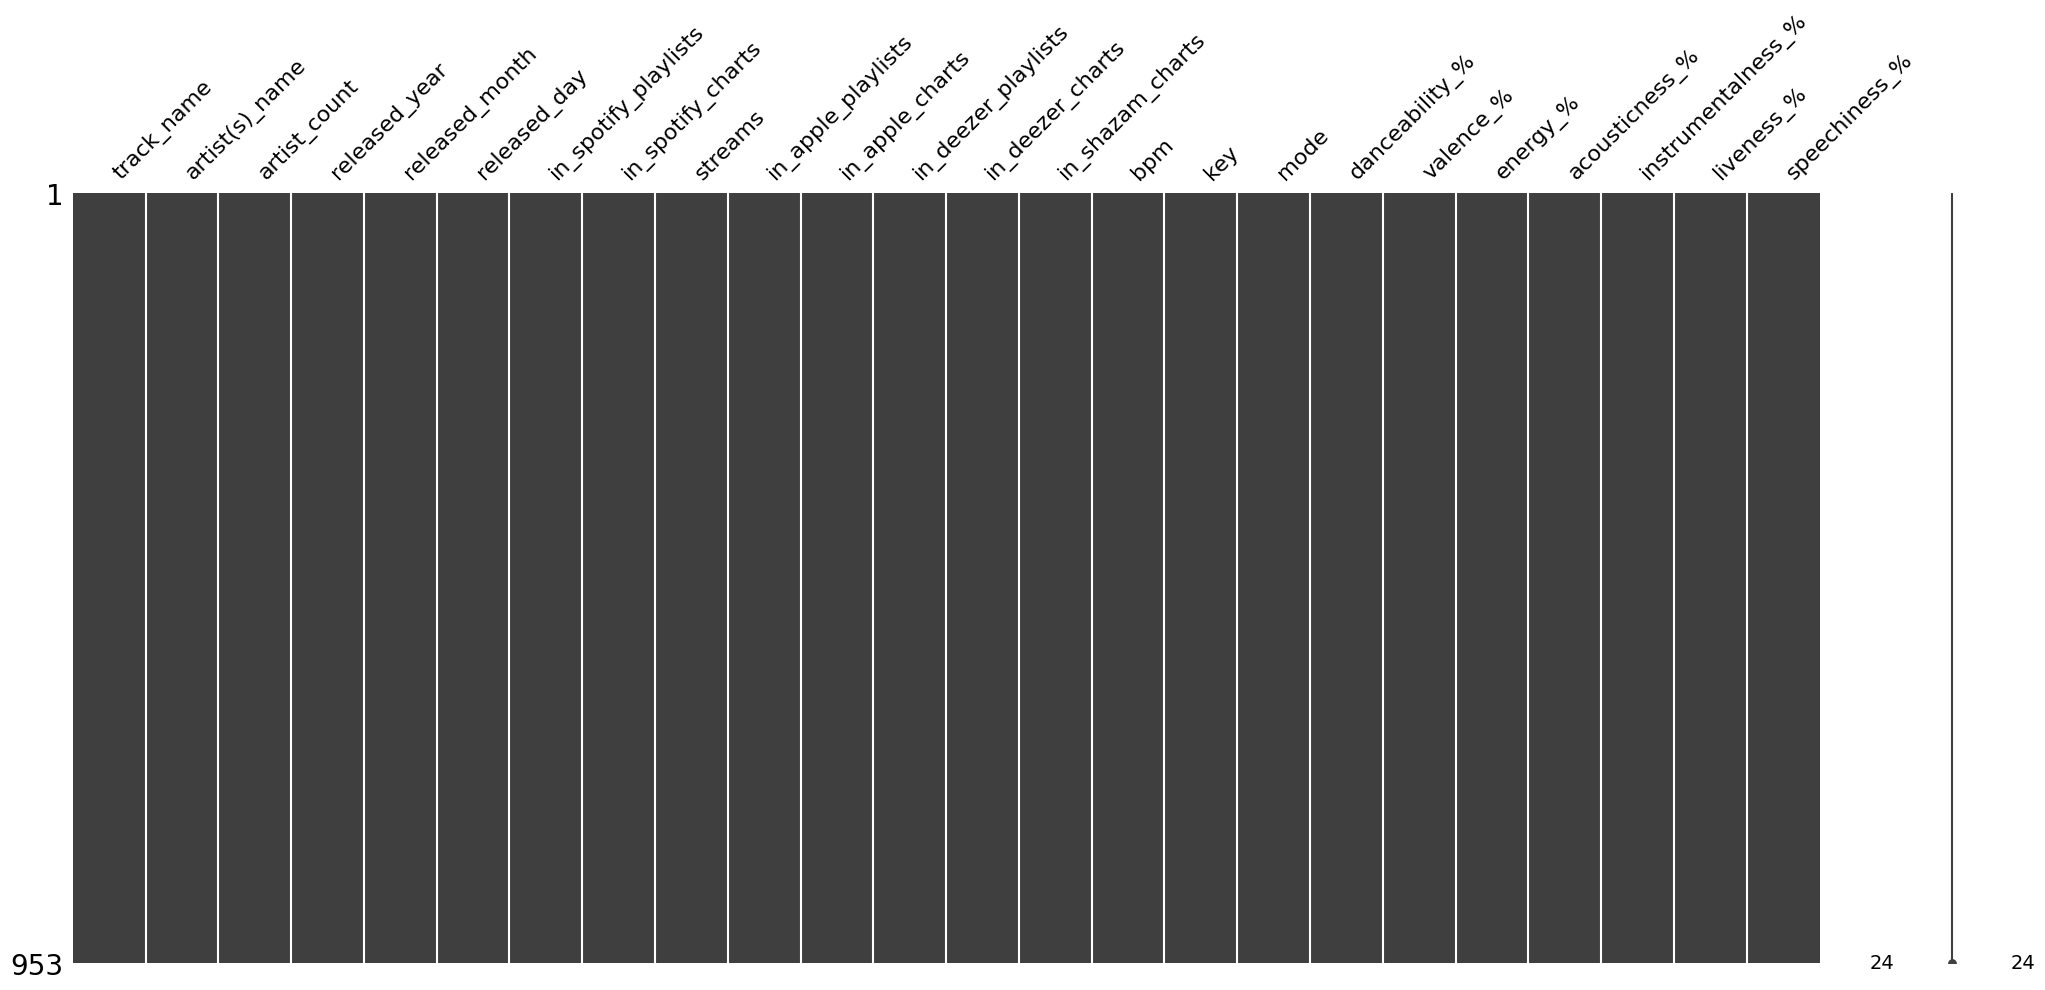

In [27]:
## Visualization of Missing Values
import missingno as msno
msno.matrix(df)

In [29]:
## checking for duplicates
df[df.duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [32]:
## Changing Data type to Numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['streams'], errors='coerce')

In [34]:
## Converting Key to Category
df['key'] = df['key'].astype('category')

In [35]:
## Standardize colum names and values
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [38]:
## Renaming Columns
df.rename(columns={'in_deezer_playlists': 'deezer_playlists','artist(s)_name':'artist_name','in_spotify_playlists':'spotify_playlist','in_spotify_charts':'spotify_chart','in_apple_playlists':'apple_playlist','in_apple_charts':'apple_chart','in_deezer_charts':'deezer_chart','in_shazam_charts':'shazam_chart'}, inplace=True)

In [55]:
# Top 10 Artists on Spotify 2023 List
top_10_artists = df['artist_name'].value_counts().head(10).reset_index()
top_10_artists.columns = ['artist_name', 'track_count']

print(top_10_artists)


      artist_name  track_count
0    Taylor Swift           34
1      The Weeknd           22
2             SZA           19
3       Bad Bunny           19
4    Harry Styles           17
5  Kendrick Lamar           12
6   Morgan Wallen           11
7      Ed Sheeran            9
8             BTS            8
9            Feid            8


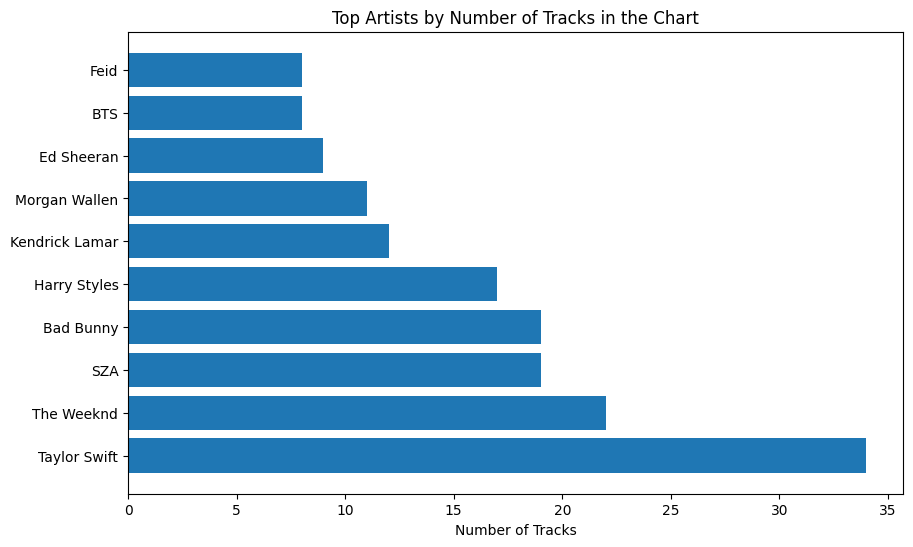

In [69]:
## Bar Chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists['artist_name'], top_10_artists['track_count'])
plt.xlabel('Number of Tracks')
plt.title('Top Artists by Number of Tracks in the Chart')
plt.show()

In [73]:
#Calculate the average streams per song
average_streams = df['streams'].mean()

print(f"Average number of streams per song: {average_streams:,.0f}")

Average number of streams per song: 514,137,425


In [76]:
#Track with the highest energy (energy_%)?
max_energy_row = df.loc[df['energy_%'].idxmax()]
print("Most energetic song:")
print("Track:", max_energy_row['track_name'])
print("Artist:", max_energy_row['artist_name'])
print("Energy %:", max_energy_row['energy_%'])


Most energetic song:
Track: I'm Good (Blue)
Artist: Bebe Rexha, David Guetta
Energy %: 97


In [79]:
#Track with the least energy (energy_%)?
min_energy_row = df.loc[df['energy_%'].idxmin()]
print("Least energetic song:")
print("Track:", min_energy_row['track_name'])
print("Artist:", min_energy_row['artist_name'])
print("Energy %:", min_energy_row['energy_%'])

Least energetic song:
Track: What Was I Made For? [From The Motion Picture "Barbie"]
Artist: Billie Eilish
Energy %: 9


In [84]:
# Most Streamed track of 2023
highest_stream_song = df.loc[df['streams'].idxmax()]
print("Most Streamed Song:")
print('Track:',highest_stream_song['track_name'])
print('Artist:',highest_stream_song['artist_name'])
print('streams:',highest_stream_song['streams'])

Most Streamed Song:
Track: Blinding Lights
Artist: The Weeknd
streams: 3703895074.0


In [88]:
# Most danceable Song
most_danceable_song = df.loc[df['danceability_%'].idxmax()]
print("Most Danceable Song")
print('Track:',most_danceable_song['track_name'])
print('Artist',most_danceable_song['artist_name'])
print('Danceability',most_danceable_song['danceability_%'],"%")

Most Danceable Song
Track: Peru
Artist Ed Sheeran, Fireboy DML
Danceability 96 %


In [90]:
## Track with Highest Valance
most_positive_track = df.loc[df['valence_%'].idxmax()]
print("Most Positive Track: ")
print("Track: ",most_positive_track['track_name'])
print("Artist: ",most_positive_track['artist_name'])
print('Positivity: ',most_positive_track['valence_%'])

Most Positive Track: 
Track:  Zona De Perigo
Artist:  Leo Santana
Positivity:  97


In [103]:
## Which month highest songs are released.
import calendar

# Assuming 'month_column' contains integers (1-12)
monthly_counts = df['released_month'].value_counts().sort_index()

# Find and display the peak month
peak_month = monthly_counts.idxmax()
peak_count = monthly_counts.max()
month_name = calendar.month_name[peak_month]

print(f"Month with most releases: {month_name} ({peak_count} songs)")

Month with most releases: January (134 songs)


In [107]:
## Month with least songs released
monthly_counts = df['released_month'].value_counts().sort_index()
least_month = monthly_counts.idxmin()
least_count = monthly_counts.min()
month_name = calendar.month_name[least_month]

print(f"Month with least releases: {month_name} ({least_month} songs)")


Month with least releases: August (8 songs)


In [109]:
df['total_charts'] = (
    df['spotify_chart'] +
    df['apple_chart'] +
    df['deezer_chart'] +
    df['shazam_chart']
)


In [112]:
top_charted_songs = df.sort_values(by='total_charts', ascending=False)


In [114]:
top_charted_songs[['track_name', 'artist_name', 'total_charts']].head(10)


,track_name,artist_name,total_charts
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


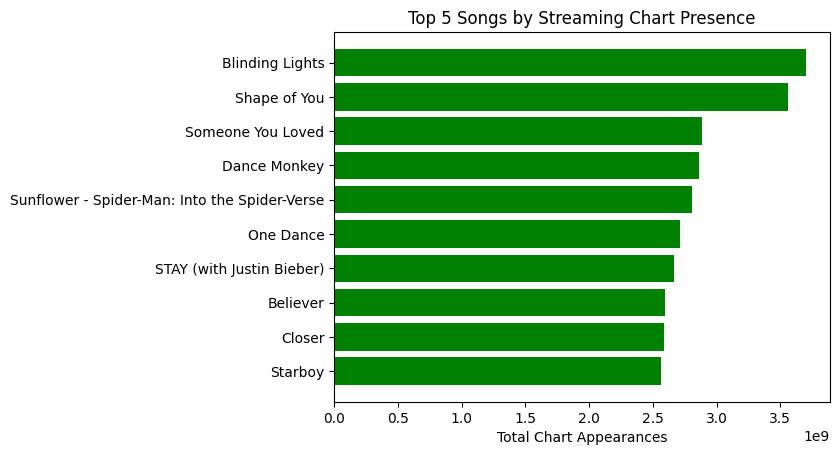

In [116]:
top5 = top_charted_songs.head(10)
plt.barh(top5['track_name'], top5['total_charts'], color='green')
plt.xlabel('Total Chart Appearances')
plt.title('Top 5 Songs by Streaming Chart Presence')
plt.gca().invert_yaxis()
plt.show()


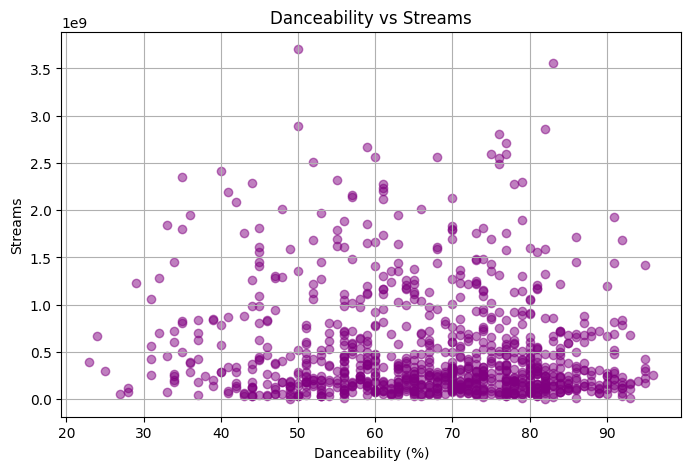

In [117]:
# correlation between daceability and Streamns
plt.figure(figsize=(8, 5))
plt.scatter(df['danceability_%'], df['streams'], alpha=0.5, color='purple')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.title('Danceability vs Streams')
plt.grid(True)
plt.show()


In [122]:
# Convert to string
if df['valence_%'].dtype == 'object':
    df['valence_%'] = df['valence_%'].str.rstrip('%').astype(float)


In [124]:
# Average valence of 2023 songs
df_2023 = df[df['released_year'] == 2023]

# Calculate average valence
avg_valence = df_2023['valence_%'].mean()
print("Average valence (% positivity) of 2023 songs:", round(avg_valence, 2))


Average valence (% positivity) of 2023 songs: 55.08


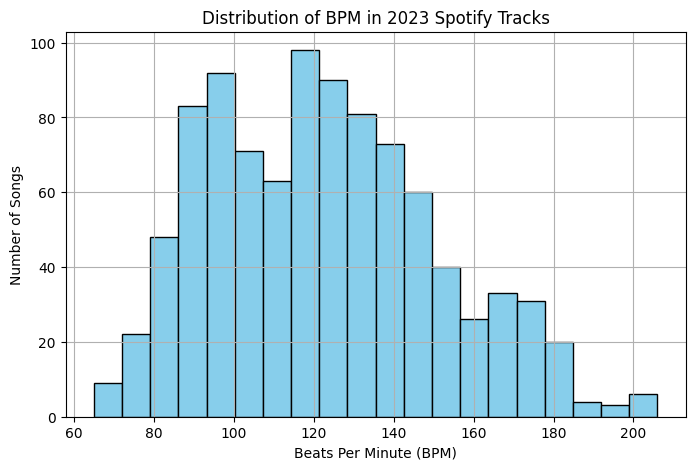

In [125]:
# What is the distribution of BPN accross all tracks
plt.figure(figsize=(8, 5))
plt.hist(df['bpm'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Number of Songs')
plt.title('Distribution of BPM in 2023 Spotify Tracks')
plt.grid(True)
plt.show()


<ipython-input-127-98e27bd7317d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['bpm'], shade=True, color='purple')


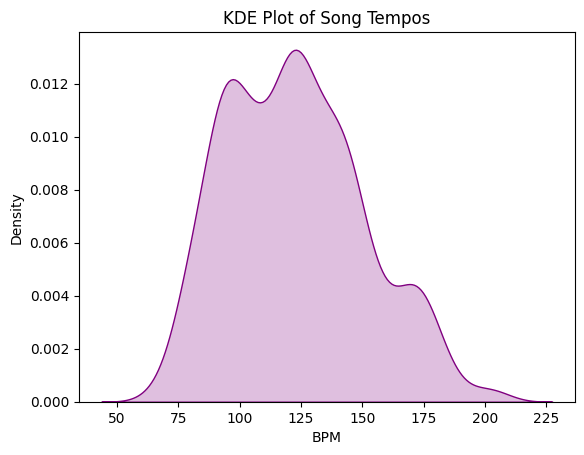

In [127]:
import seaborn as sns

sns.kdeplot(df['bpm'], shade=True, color='purple')
plt.xlabel('BPM')
plt.title('KDE Plot of Song Tempos')
plt.show()


In [128]:
if df['speechiness_%'].dtype == 'object':
    df['speechiness_%'] = df['speechiness_%'].str.rstrip('%').astype(float)


In [129]:
correlation = df['speechiness_%'].corr(df['streams'])
print("Correlation between speechiness and streams:", correlation)


Correlation between speechiness and streams: -0.11233299640338548


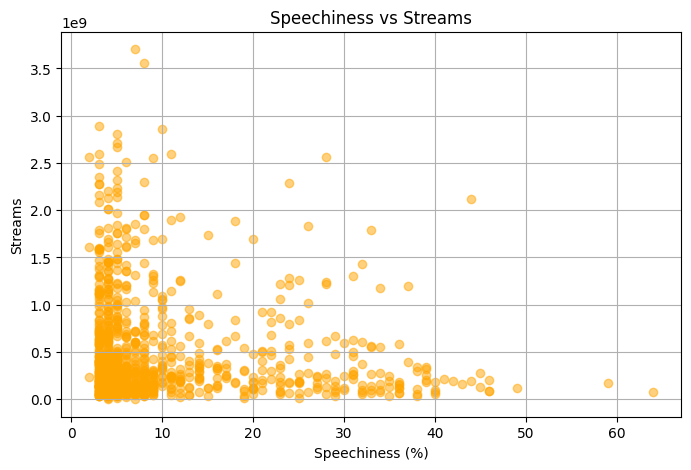

In [130]:
plt.figure(figsize=(8, 5))
plt.scatter(df['speechiness_%'], df['streams'], alpha=0.5, color='orange')
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams')
plt.title('Speechiness vs Streams')
plt.grid(True)
plt.show()
